In [37]:
import control as ctrl
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

## Ejercicio 2.1

Dado el siguiente sistema de tiempo continuo
$$ G(s) =\frac{1}{s^2 + 1,4s + 1}$$

- Obtener el sistema $H(z)$ muestreado con ZOH para $T = 0,4$. 
- Calcular los márgenes de ganancia para ambos. 
- ¿Qué ocurre con el mismo al variar el tiempo de muestreo?

Período de muestreo=0.4   Margen de Ganancia=7.823891633374664   Margen de fase=164.81053574750865


/home/pablo/anaconda3/envs/ica/lib/python3.12/site-packages/control/margins.py:518: UserWarning: stability_margins: Falling back to 'frd' method because of chance of numerical inaccuracy in 'poly' method.
  margin = stability_margins(sys)


Período de muestreo=0.1   Margen de Ganancia=28.692841428619708   Margen de fase=163.34718472747136
Período de muestreo=2   Margen de Ganancia=inf   Margen de fase=inf


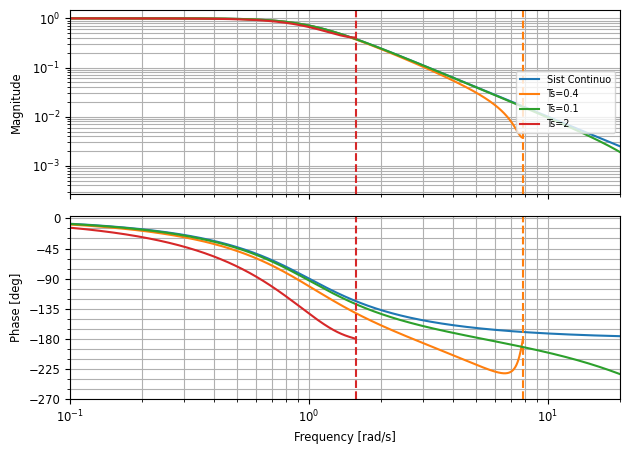

In [ ]:
s = ctrl.TransferFunction.s
G = 1/(s**2+1.4*s+1)
G.name='Sist Continuo'
TT = [0.4, 0.1, 2]

ctrl.bode(G,omega_limits=[1E-1,2E1])
for T in TT:
    H = ctrl.sample_system(G,Ts=T,method='zoh')
    gm,pm,_,_ = ctrl.margin(H)
    
    H.name = f"Ts={T}"
    ctrl.bode(H)
    

    print(f"Período de muestreo={T}   Margen de Ganancia={gm}   Margen de fase={pm}")

# Conclusión: al realimentar un sistema muestreado con un tiempo inadecuado podemos obtener un sistema de lazo cerrado inestable
# Si bien el sistema de tiempo continuo nunca pasa los -180°, el de tiempo discreto sí lo hace. Esto se debe al lag que incorpora el ZOH

## Ejercicio 2.5
Muestrear el sistema considerando un ZOH y h=1

In [53]:
s = sp.symbols('s')

G = 1/(s**2*(s+2)*(s+3))
display(G)

G_ap = G.apart()
print("Fracciones simples; Acá tendría que muestrear cada sistema simple")
display(G_ap)

# Opcion usando control
s = ctrl.TransferFunction.s
G = 1/(s**2*(s+2)*(s+3))
H = ctrl.sample_system(G,Ts=1,method='zoh')
print(H)


1/(s**2*(s + 2)*(s + 3))

Fracciones simples; Acá tendría que muestrear cada sistema simple


-1/(9*(s + 3)) + 1/(4*(s + 2)) - 5/(36*s) + 1/(6*s**2)


0.01733 z^3 + 0.08611 z^2 + 0.03261 z + 0.000879
-------------------------------------------------
z^4 - 2.185 z^3 + 1.377 z^2 - 0.1986 z + 0.006738

dt = 1



## Ejercicio 1.5

 Determinar la función de transferencia por pulsos (pulse-transfer function) del siguiente sistema en tiempo discreto:
$$ x(kh+h) = \begin{bmatrix} 0.5 & -0.2\\0 & 0\end{bmatrix}x(kh)+\begin{bmatrix}2 \\ 1 \end{bmatrix}u(kh) $$
$$ y(kh)   =\begin{bmatrix}1 & 0\end{bmatrix}x(kh) $$


In [25]:
import sympy as sp

# Definir variable simbólica
z = sp.symbols('z')

# Ejemplo de matrices
Phi = sp.Matrix([[0.5, -0.2],
               [ 0,  0]])
Gamma = sp.Matrix([[2],
               [1]])
C = sp.Matrix([[1, 0]])

# Matriz identidad del mismo tamaño que A
I = sp.eye(Phi.shape[0])

# Expresión de la transferencia
H = C * ( (z*I - Phi).inv() ) * Gamma
H_simplificada = sp.simplify(H)

print("H(z) usando sympy  =")
sp.pprint(H_simplificada)


## Otra forma usando control
Hss = ctrl.ss(Phi,Gamma,C,[[0]],dt=1)
Hz = ctrl.ss2tf(Hss)
print("\n\nH(z) usando ss2tf = ",Hz)

H(z) usando sympy  =
⎡  2.0⋅z - 0.2  ⎤
⎢───────────────⎥
⎣z⋅(1.0⋅z - 0.5)⎦


H(z) usando ss2tf =  <TransferFunction>: sys[248]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 1

         2 z - 0.2
  -----------------------
  z^2 - 0.5 z + 1.241e-17


## Ejercicio 2.3

 Dado el sistema discreto
	      $$
		      x(k+1)=\begin{bmatrix}
			      0 & 1 & 2 \\ 0& 0 & 3 \\ 0&0&0
		      \end{bmatrix}x(k)+\begin{bmatrix}
			      0 \\ 1 \\ 0
		      \end{bmatrix}
		      u(k)
	      $$

- Determine una secuencia de control $\{u(0),u(1),\dots\}$ tal que el sistema pase desde el estado inicial $$x^{\top}(0)=\begin{bmatrix}1 & 1 & 1\end{bmatrix}$$ hasta el origen en un número finito de pasos.
- ¿Cuál es el número mínimo de pasos necesario para resolver el problema planteado en (a)?
- Explique por qué no es posible encontrar una secuencia de señales de control tal que el estado $$x^{\top}(0)=\begin{bmatrix} 1 & 1 & 1\end{bmatrix}$$
sea alcanzado partiendo desde el origen.


In [ ]:
Phi = sp.Matrix([[0,1,2],[0,0,3],[0,0,0]])

# Si el sistema fuera alcanzable en 3 pasos se llega
u0,u1,u2 = sp.symbols('u0,u1,u2')

x1 = Phi * np.ones((3,1)) + sp.Matrix([[0],[1],[0]]) * u0
x2 = Phi * x1 + sp.Matrix([[0],[1],[0]]) * u1
x3 = Phi * x2 + sp.Matrix([[0],[1],[0]]) * u2

print("x_1")
display(x1)
print("x_2")
display(x2)
print("x_3")
display(x3)

# Vemos que igualando x2 a cero se puede resolver
eqs = [sp.Eq(x2[i, 0],0) for i in range(x2.shape[0])]
print(eqs)

# Resolvemos para u
sol = sp.solve(eqs, (u0, u1, u2))

display(eqs)
print("Soluciones:")
print(sol)

# La mínima cantidad de pasos es 2, pero en general debieran ser 3 ya que el sistema es de 3° orden

# Vemos si es alcanzable:
Phi = np.array(Phi)
Gamma = np.array([0,1,0]).T
Wc = ctrl.ctrb(Phi,Gamma)
print("Matriz de controlabilidad Wc=\n",Wc)

U,S,Vt = np.linalg.svd(Wc)
print("U=\n",U)
print("S=\n",S)
print("Vt=\n",Vt)

# Vemos que hay un valor singular nulo => el sistema no es alcanzable
# El subespacio no alcanzable es
print("Subespacio no alcanzable= ",U[:,-1])
# Es decir que no se puede alterar el valor de la tercer variable de estado con ninguna entrada
# Como en el ejemplo valía 0, no era necesario modificarla para mostrar que era controlable


x_1


Matrix([
[     3.0],
[u0 + 3.0],
[       0]])

x_2


Matrix([
[u0 + 3.0],
[      u1],
[       0]])

x_3


Matrix([
[u1],
[u2],
[ 0]])

[Eq(u0 + 3.0, 0), Eq(u1, 0), True]


[Eq(u0 + 3.0, 0), Eq(u1, 0), True]

Soluciones:
{u0: -3.00000000000000, u1: 0.0}
Matriz de controlabilidad Wc=
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
U=
 [[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
S=
 [1. 1. 0.]
Vt=
 [[-0. -1. -0.]
 [-1. -0. -0.]
 [ 0.  0.  1.]]
Subespacio no alcanzable=  [0. 0. 1.]


## Ejercicio 2.4

Obtener el sistema muestreado de
	      $$G(s)=\frac{s+1}{s^2+0.2s+1}$$

Determinar los valores de $T$ para los que el sistema tendrá oscilaciones ocultas

Text(0, 0.5, 'Salida')

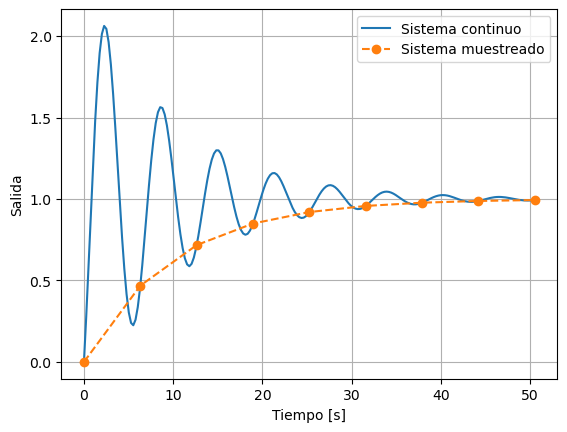

In [49]:
s = ctrl.TransferFunction.s
G = (s+1)/(s**2+0.2*s+1)
# Sistema de segundo orden
wn = 1
xi = 0.2/2
# Se observa que el sistema tiene una oscilación con pulsación
wd = wn * np.sqrt(1-xi**2)

# Entonces si muestreamo a 
T = 2*np.pi/wd
H = ctrl.sample_system(G,Ts=T)

t,y= ctrl.step_response(G,T=50)
td,yd = ctrl.step_response(H,T=50)

plt.plot(t,y,label='Sistema continuo')
plt.plot(td,yd,'o--',label='Sistema muestreado')
plt.grid()
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')